<a href="https://colab.research.google.com/github/Nakulpradeep94/Bike_Sharing_demand_prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg                             
%matplotlib inline    
import seaborn as sns
from datetime import datetime
from datetime import date

# Mounting drive

In [3]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading dataset

In [4]:
#reading file from the dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ALMABETTER/Bike Sharing demand prediction/SeoulBikeData.csv', encoding = "ISO-8859-1")

# **Exploratory data analysis**

In [5]:
# to go through first 5 index of dataset
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
#last 5 records of the dataset
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
#to get column or feature names of the dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
# to find data types of columns from the given data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
#to find the number of elements in the dataset
df.size

122640

In [10]:
#to get the number of columns and rows in the given dataset
df.shape

(8760, 14)

We can see that there are 8760 rows for the given dataset and all the features or columns have 8760 non null values. hence we can deduce that there are no null values for the given dataset.However a proper and direct method is using isnull method which will be done a few steps later

In [11]:
#to get the summary statistics for numerical columns in our DataFrame
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [12]:
# descriptive summary of all columns 
df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [13]:
# To transpose data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


Maximum number of bikes rented in an hour is 3556. The average count is 704.602055

In [14]:
#to check the number of  null values in the dataset
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [15]:
#Checking if there are any null values in the dataframe
df.isnull().values.any()

False

We can see that there are no null values for the given dataset

In [16]:
df[df.duplicated()].shape

(0, 14)

We can see that there are no duplicated rows in the given dataset

In [17]:
#to get number of unique values for each of the feature
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

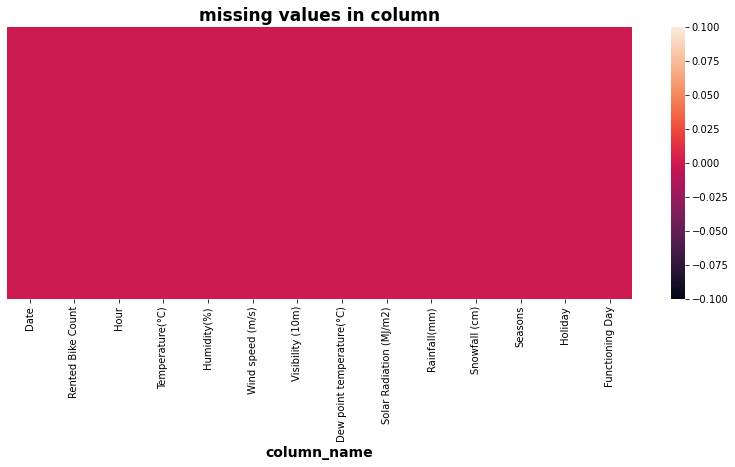

In [18]:
# Checking missing values
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

In [19]:
#to convert date from string to date format
df['Date']=df['Date'].apply(lambda x:datetime.strptime(x, '%d/%m/%Y'))

In [20]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [22]:
#Creating a feature showing year
df['Year']=df['Date'].apply(lambda x: x.year)

In [23]:
#Creating feature showing month
df['Month']=df['Date'].apply(lambda x: x.month)

In [24]:
#Creating feature showing day of month
df['Day']=df['Date'].apply(lambda x :x.day)

In [25]:
#Creating feature showing  day of week
df['day_of_week']=df['Date'].dt.day_name()

In [26]:
#new dataframe
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,day_of_week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday


Analysis with respect to date

In [27]:
#dataframe with date and the total rented bike count
Date_df=df.groupby(['Date']).agg({"Date": "count","Rented Bike Count":"sum"}).sort_values(by=['Rented Bike Count'], ascending=False).rename(columns={'Date':'Count','Rented Bike Count':'Sum ofrentedbikes'})
Date_df.head()

,Count,Sum ofrentedbikes
Date,,
2018-06-13,24,36149
2018-06-19,24,35349
2018-06-08,24,35103
2018-06-20,24,34639
2018-06-21,24,34621


Maximum number of Bikes were rented on the Date: 13th June 2018 and the total number of bikes rented on that day is 36149. It was the day of korean byelection so the large number of bike rental could be because of that

In [28]:
Date_df.tail(15)

,Count,Sum ofrentedbikes
Date,,
2017-12-24,24,2014
2018-11-08,24,1721
2018-04-23,24,977
2018-11-09,24,0
2018-04-11,24,0
2018-10-02,24,0
2018-09-18,24,0
2018-11-03,24,0
2018-09-30,24,0


There are 12 days  in which no bikes where rented

In [29]:
# checking for dataframe where count is other than 24
Date_df[~Date_df['Count']==24]

,Count,Sum ofrentedbikes
Date,,


Implying total count of date is 24 for all the given dataset.The dates are from 01-12-2017 to to 30/11/2018 .This means that the 8760 records(rows) are the 24 records for each day in the one year duration (24 * 365 = 8760 )

In [30]:
Date_df[Date_df['Sum ofrentedbikes']==0]

,Count,Sum ofrentedbikes
Date,,
2018-11-09,24,0
2018-04-11,24,0
2018-10-02,24,0
2018-09-18,24,0
2018-11-03,24,0
2018-09-30,24,0
2018-09-28,24,0
2018-10-04,24,0
2018-09-19,24,0


In [31]:
merge_date_df=pd.merge(Date_df[Date_df['Sum ofrentedbikes']==0],df,how='left',on='Date')
merge_date_df

,Date,Count,Sum ofrentedbikes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,day_of_week
0,2018-11-09,24,0,0,0,12.0,96,3.1,1185,11.3,0.00,18.0,0.0,Autumn,No Holiday,No,2018,11,9,Friday
1,2018-11-09,24,0,0,1,11.4,89,2.6,1376,9.6,0.00,0.0,0.0,Autumn,No Holiday,No,2018,11,9,Friday
2,2018-11-09,24,0,0,2,11.3,88,3.7,1680,9.3,0.00,0.0,0.0,Autumn,No Holiday,No,2018,11,9,Friday
3,2018-11-09,24,0,0,3,10.8,82,2.8,1712,7.8,0.00,0.5,0.0,Autumn,No Holiday,No,2018,11,9,Friday
4,2018-11-09,24,0,0,4,10.6,75,3.2,913,6.3,0.00,0.0,0.0,Autumn,No Holiday,No,2018,11,9,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2018-05-10,24,0,0,19,15.5,74,3.6,675,10.8,0.35,0.0,0.0,Spring,No Holiday,No,2018,5,10,Thursday
284,2018-05-10,24,0,0,20,13.6,82,2.1,520,10.5,0.02,0.0,0.0,Spring,No Holiday,No,2018,5,10,Thursday
285,2018-05-10,24,0,0,21,12.6,85,2.4,460,10.1,0.00,0.0,0.0,Spring,No Holiday,No,2018,5,10,Thursday
286,2018-05-10,24,0,0,22,12.3,85,2.3,452,9.8,0.00,0.0,0.0,Spring,No Holiday,No,2018,5,10,Thursday


In [32]:
merge_date_df.shape

(288, 20)

In [33]:
merge_date_df[merge_date_df['Functioning Day']=='No']

,Date,Count,Sum ofrentedbikes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,day_of_week
0,2018-11-09,24,0,0,0,12.0,96,3.1,1185,11.3,0.00,18.0,0.0,Autumn,No Holiday,No,2018,11,9,Friday
1,2018-11-09,24,0,0,1,11.4,89,2.6,1376,9.6,0.00,0.0,0.0,Autumn,No Holiday,No,2018,11,9,Friday
2,2018-11-09,24,0,0,2,11.3,88,3.7,1680,9.3,0.00,0.0,0.0,Autumn,No Holiday,No,2018,11,9,Friday
3,2018-11-09,24,0,0,3,10.8,82,2.8,1712,7.8,0.00,0.5,0.0,Autumn,No Holiday,No,2018,11,9,Friday
4,2018-11-09,24,0,0,4,10.6,75,3.2,913,6.3,0.00,0.0,0.0,Autumn,No Holiday,No,2018,11,9,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2018-05-10,24,0,0,19,15.5,74,3.6,675,10.8,0.35,0.0,0.0,Spring,No Holiday,No,2018,5,10,Thursday
284,2018-05-10,24,0,0,20,13.6,82,2.1,520,10.5,0.02,0.0,0.0,Spring,No Holiday,No,2018,5,10,Thursday
285,2018-05-10,24,0,0,21,12.6,85,2.4,460,10.1,0.00,0.0,0.0,Spring,No Holiday,No,2018,5,10,Thursday
286,2018-05-10,24,0,0,22,12.3,85,2.3,452,9.8,0.00,0.0,0.0,Spring,No Holiday,No,2018,5,10,Thursday


We can see clearly that the days where there was zero rented bikes where non functioning days

In [34]:
#Understand the hour details of the datas
df['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [35]:
df['Hour'].value_counts().sort_index()

0     365
1     365
2     365
3     365
4     365
5     365
6     365
7     365
8     365
9     365
10    365
11    365
12    365
13    365
14    365
15    365
16    365
17    365
18    365
19    365
20    365
21    365
22    365
23    365
Name: Hour, dtype: int64

In [36]:
#Checking for total number of bikes rented for each hours


In [37]:
df.groupby(['Hour'])['Rented Bike Count'].sum()

Hour
0     197633
1     155557
2     110095
3      74216
4      48396
5      50765
6     104961
7     221192
8     370731
9     235784
10    192655
11    219311
12    255296
13    267635
14    276971
15    302653
16    339677
17    415556
18    548568
19    436229
20    390172
21    376479
22    336821
23    244961
Name: Rented Bike Count, dtype: int64

Text(0, 0.5, 'Total number of rental bikes')

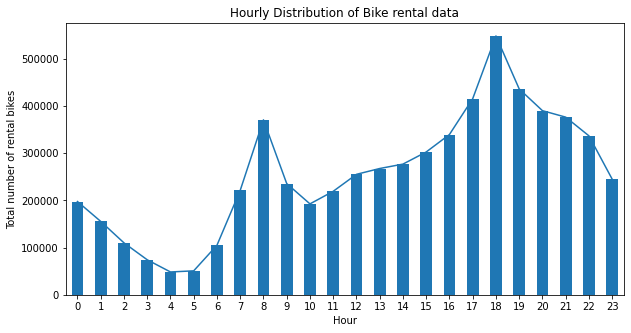

In [38]:
#Hourly distribution of the bike rental service rented count
df.groupby(['Hour'])['Rented Bike Count'].sum().plot.bar(figsize=(10,5))
df.groupby(['Hour'])['Rented Bike Count'].sum().plot()
plt.title("Hourly Distribution of Bike rental data")
plt.ylabel("Total number of rental bikes")

Bike demand is maximum between 17th hour to 19th hour ie between 5pm to 7pm.

Text(0, 0.5, 'Total number of rental bikes')

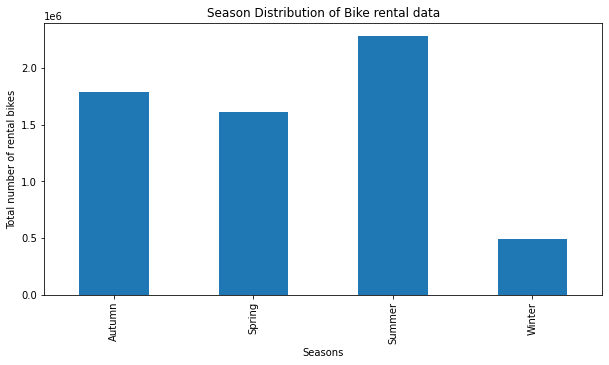

In [39]:
# Seasonal distribution of the bike rental service rented count
df.groupby(['Seasons'])['Rented Bike Count'].sum().plot.bar(figsize=(10,5))
plt.title("Season Distribution of Bike rental data")
plt.ylabel("Total number of rental bikes")

People use rental bikes most during Summer and least during Winter

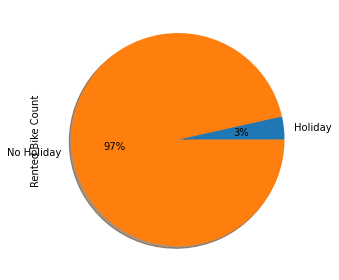

In [44]:
#Total number of bikes rent based on holiday ----pie chart
df.groupby('Holiday').sum()['Rented Bike Count'].plot.pie(autopct='%.0f%%',shadow=True)
plt.tight_layout()


It is clear from the pie chart that people use rental bikes rarely on holidays

In [ ]:
# creating boxplot for all categorical feature
n=1
plt.figure(figsize=(20,15))
for i in categorical_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  plt.pie(df[i].value_counts(),labels = df[i].value_counts().keys().tolist(),autopct='%.0f%%')
  plt.title(i)
  plt.tight_layout()